This script demonstrates the first order Taylor expansion of a given function

Name : Sojung An


In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)
real_train_label    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    real_train_label[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1
    
# 
# plot first 150 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

<Figure size 640x480 with 150 Axes>

<Figure size 640x480 with 10 Axes>

# Label is 0, return 1, label is not 0, return -1 

In [2]:
def makevecY(vecY):
    for i in range(0, len(vecY)):
        if(int(vecY[i]) == 0):
            vecY[i] = 1 # label == 0, return 1
        else:
            vecY[i] = -1 # label != 0, return -1
    return vecY

# Make Convolution Feature: 5 by 5

In [3]:
def makevecX(vecX):
    matrix = []
    for i in range(len(vecX)):
        matrix_ = vecX[i].reshape((size_row, size_col))
        matrix_ = filt(matrix_)
        matrix_ = np.ravel(matrix_, order='C')
        matrix.append(matrix_)
    return matrix

In [4]:
from scipy import signal
def filt(matrix):
    kernel = np.array([[ -1, -1, -1, -1, -1],[-1,  2,  2,  2, -1],[-1,  2,  8,  2, -1],[-1,  2,  2,  2, -1],[-1, -1, -1, -1, -1]])
    matrix = signal.convolve2d(matrix, kernel, boundary='symm', mode='same')
    return matrix

# Least Square Approximation: $ W = (X^T X)^{-1} X^T y $ 

In [5]:
def computeApproximation(vecX,vecY):
    vecX = np.mat(vecX)
    vecY = np.mat(vecY).T
    xTx = vecX.T * vecX
    if(np.linalg.det(xTx) == 0.0): # if Singular function, return 
        print("This matrix is singular")
        return
    weight = xTx.I * (vecX.T * vecY) # weight
    return weight

# After training, return result of the test data

In [8]:
def computeTrain(trainvecX, trainvecY, testvecX, testvecY):
    matrixX = makevecX(trainvecX)
    matrixY = makevecY(trainvecY)
    weight = computeApproximation(matrixX, matrixY)
    matrixtestX = makevecX(testvecX)
    matrixtestY =  makevecY(testvecY)
    result = matrixtestX*weight
    return result, matrixtestY

In [9]:
result, matrixtestY = computeTrain(list_image_train.T, list_label_train, list_image_test.T, list_label_test)

C:\Users\My\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1874: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


# Function of Binary Classification

True Positive = result label = 1, real label = 1

False Postive = result label = 1, real label = -1

True Negative = result label = -1, real label = -1

False Negative = result label = -1, real label = 1

In [49]:
def binaryClassifier(result, matrixtestY, testvecX):
    FN = []; FP = []; TN = []; TP = []
    for i in range(0, len(result)):
        if(float(result[i]) > 0):
            if(int(matrixtestY[i]) == 1):
                TP.append(testvecX[i])
            else:
                FP.append(testvecX[i])
        else:
            if(int(matrixtestY[i]) == 1):
                FN.append(testvecX[i])
            else:
                TN.append(testvecX[i])
    return FN, FP, TN, TP

In [53]:
FN, FP, TN, TP = binaryClassifier(result, matrixtestY, list_image_test.T)

# Compute Accuracy

In [84]:
accuracy = ((len(TN)+len(TP))/10000)*100
print("Accuracy: ",accuracy)

Accuracy:  50.24999999999999


# Compute Average FN, FP, TN, TP

In [75]:
def computeMin(vec):
    vec = np.mat(vec)
    mean_ = np.mean(vec, axis=0)
    return mean_

# Visualization 

(-0.5, 27.5, 27.5, -0.5)

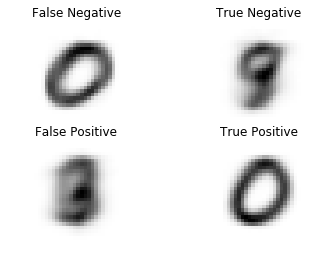

In [83]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)


P1 = plt.subplot(2, 2, 1)
P1.set_title('False Negative')
im_average = computeMin(FN)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P2 = plt.subplot(2, 2, 2)
P2.set_title('True Negative')
im_average = computeMin(TN)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P3 = plt.subplot(2, 2, 3)
P3.set_title('False Positive')
im_average = computeMin(FP)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P4 = plt.subplot(2, 2, 4)
P4.set_title('True Positive')
im_average = computeMin(TP)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')